In [1]:
import numpy as np, curvedsky as cs, sys, plottools as pl, local, tools_cmbalm, tqdm
from matplotlib.pyplot import *

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
def aps_read(qids):
    aobj = {q: local.init_analysis_params(qid=q) for q in qids}
    mcl  = {q: (np.loadtxt(aobj[q].fscl['c'])).T[1] for q in qids}
    ncl  = {q: (np.loadtxt(aobj[q].fscl['n'])).T[1] for q in qids}
    return aobj, mcl, ncl

In [3]:
def SNR(L,ckk,nkk,Lmin=100,fsky=2000./41000.):
    snr = np.sqrt( fsky * np.sum( (L[Lmin:]+.5)*ckk[Lmin:]**2/(ckk+nkk)[Lmin:]**2 ) )
    print(snr)
    return snr

In [4]:
def comb_Nl(qids,mcl,ncl,cTT):
    Nl = 0.
    for q in qids:
        flT = (mcl[q]-ncl[q])/cTT
        flT = 1.
        Nl += flT/ncl[q]
    Nl = 1./Nl
    return Nl

In [38]:
qids_d = ['boss_d01','boss_d02','boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_n = ['boss_01','boss_02','boss_03','boss_04']
qids_d_sub = ['boss_d03','boss_d04','s16_d01','s16_d02','s16_d03']
qids_n_sub = ['boss_02','boss_03','boss_04']
qids_t = qids_d + qids_n

In [39]:
aobj, mcl, ncl = aps_read(qids_t)
cTT = aobj[qids_t[0]].lcl[0,:]

In [40]:
Ncl_d = comb_Nl(qids_d,mcl,ncl,cTT)
Ncl_n = comb_Nl(qids_n,mcl,ncl,cTT)
Ncl_d_sub = comb_Nl(qids_d_sub,mcl,ncl,cTT)
Ncl_n_sub = comb_Nl(qids_n_sub,mcl,ncl,cTT)
Ncl_t = 1./(1./Ncl_d+1./Ncl_n)

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


In [41]:
Lmax = 2048
rlmax = 3000
L = np.linspace(0,Lmax,Lmax+1)
ckk = aobj[qids_t[0]].ckk[:Lmax+1]
rlmin = 500

In [42]:
Ag_d, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_d)[:rlmax+1],gtype='k')
Ag_n, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_n)[:rlmax+1],gtype='k')
Ag_d_sub, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_d_sub)[:rlmax+1],gtype='k')
Ag_n_sub, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_n_sub)[:rlmax+1],gtype='k')
Ag_t, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_t)[:rlmax+1],gtype='k')

In [43]:
SNR(L,ckk,Ag_d,Lmin=10)
SNR(L,ckk,Ag_n,Lmin=10)
SNR(L,ckk,Ag_t,Lmin=10)
SNR(L,ckk,Ag_d_sub,Lmin=10)
SNR(L,ckk,Ag_n_sub,Lmin=10)

24.6276491927657
17.532612086209017
28.002748116419387
23.51586135097568
16.56694059723558


16.56694059723558

In [44]:
SNR(L,ckk,Ag_d,Lmin=50)
SNR(L,ckk,Ag_n,Lmin=50)
SNR(L,ckk,Ag_t,Lmin=50)
SNR(L,ckk,Ag_d_sub,Lmin=50)
SNR(L,ckk,Ag_n_sub,Lmin=50)

24.16957167759653
17.08718314532772
27.545365125657643
23.058077964158393
16.125698040668084


16.125698040668084

In [12]:
rlmins = np.arange(1000,400,-100)
SN_d = np.zeros(len(rlmins))
SN_n = np.zeros(len(rlmins))
SN_t = np.zeros(len(rlmins))
for i, rlmin in enumerate(rlmins):
    Ag = {}
    for q in tqdm.tqdm(qids_t):
        Ag[q], __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+ncl[q])[:rlmax+1],gtype='k')
    Ag_d, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_d)[:rlmax+1],gtype='k')
    Ag_n, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_n)[:rlmax+1],gtype='k')
    Ag_t, __ = cs.norm_lens.qtt(Lmax,rlmin,rlmax,cTT[:rlmax+1],(cTT+Ncl_t)[:rlmax+1],gtype='k')
    #Ag['TE'], Ac['TE'] = cs.norm_lens.qte(Lmax,rlmin,rlmax,lcl[3,:],lcl[0,:],lcl[1,:])
    #Ag['EE'], Ac['EE'] = cs.norm_lens.qee(Lmax,rlmin,rlmax,lcl[1,:],lcl[1,:])
    #Ag['TB'], Ac['TB'] = cs.norm_lens.qtb(Lmax,rlmin,rlmax,lcl[3,:],lcl[0,:],lcl[2,:])
    #Ag['EB'], Ac['EB'] = cs.norm_lens.qeb(Lmax,rlmin,rlmax,lcl[1,:],lcl[1,:],lcl[2,:])
    SN_d[i] = SNR(L,ckk,Ag_d)
    SN_n[i] = SNR(L,ckk,Ag_n)
    SN_t[i] = SNR(L,ckk,Ag_t)

  0%|          | 0/11 [00:00<?, ?it/s]

21.68262097670025
14.638735393395061
25.016345129296916


  0%|          | 0/11 [00:00<?, ?it/s]

22.30460372123854
15.30994679741592
25.635334157374164


  0%|          | 0/11 [00:00<?, ?it/s]

22.623262298336726
15.624986433204876
25.965264766776894


  0%|          | 0/11 [00:00<?, ?it/s]

22.761650289635764
15.75385398694887
26.114764732254393


100%|██████████| 11/11 [00:33<00:00,  3.09s/it]


22.8901837497692
15.880134748861284
26.25223920924642


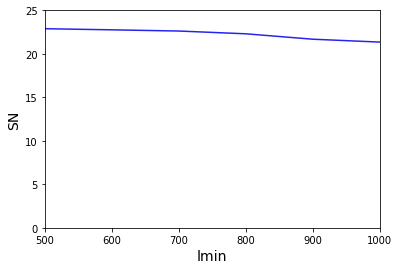

In [13]:
pl.plot_1dstyle(xmin=500,xmax=1000,ymin=0,ymax=25,xlab='lmin',ylab='SN')
plot(rlmins,SN_d)

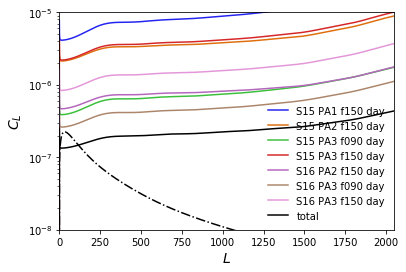

In [14]:
pl.plot_1dstyle(ylog=True,xmin=1,xmax=Lmax,ymin=1e-8,ymax=1e-5)
for q in qids_d:
    plot(L,Ag[q],label=local.qid_label(q))
plot(L,Ag_d,'-',label='total',color='k')
plot(L,ckk,color='k',ls='-.')
legend()

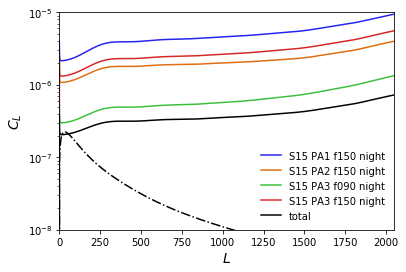

In [15]:
pl.plot_1dstyle(ylog=True,xmin=1,xmax=Lmax,ymin=1e-8,ymax=1e-5)
for q in qids_n:
    plot(L,Ag[q],label=local.qid_label(q))
plot(L,Ag_n,'-',label='total',color='k')
plot(L,ckk,color='k',ls='-.')
legend()

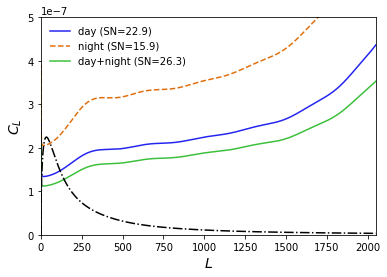

In [16]:
pl.plot_1dstyle(ylog=False,xmin=1,xmax=Lmax,ymin=0.,ymax=5e-7)
plot(L,Ag_d,'-',label='day (SN='+str(np.round(SN_d[-1],1))+')')
plot(L,Ag_n,'--',label='night (SN='+str(np.round(SN_n[-1],1))+')')
plot(L,Ag_t,'-',label='day+night (SN='+str(np.round(SN_t[-1],1))+')')
plot(L,ckk,color='k',ls='-.')
legend()